In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load expression data (assuming it's a CSV file)
expression_data = pd.read_csv('SRP158491_normalized_logscaled_std_sorted.csv', index_col=0)

# Transpose the data so that rows represent samples and columns represent genes
expression_data = expression_data.T

# Load metadata (TSV file)
metadata = pd.read_csv('metadata_SRP158491.tsv', sep='\t')

# Check if the gene names (index) are unique
if not expression_data.index.is_unique:
    print("There are duplicate gene names.")
    # Drop duplicates, keeping the first occurrence
    expression_data = expression_data.loc[~expression_data.index.duplicated(keep='first')]

# Calculate standard deviation for each gene (across samples)
gene_variability = expression_data.std(axis=0)

# Sort genes by variability and select the top 5,000 most variable genes
most_variable_genes = gene_variability.nlargest(5000).index

# Subset the expression data to the top 5,000 most variable genes and then transpose for samples as rows
subset_expression_data = expression_data[most_variable_genes].T

# Filter the metadata to only include samples present in subset_expression_data
filtered_metadata = metadata[metadata['refinebio_accession_code'].isin(subset_expression_data.index)]

# Reorder expression data to match the sample order in filtered_metadata
subset_expression_data = subset_expression_data.loc[filtered_metadata['refinebio_accession_code']]

# Use 'refinebio_disease' as the column for health status and map it to binary labels
print("Unique values in refinebio_disease:", filtered_metadata['refinebio_disease'].unique())

# Adjust the mapping to convert 'healthy' and 'ra non treatment' to binary labels
filtered_metadata['refinebio_disease'] = filtered_metadata['refinebio_disease'].map({'healthy': 0, 'ra non treatment': 1})

# Check for NaN values after mapping
print("NaN values in refinebio_disease after mapping:", filtered_metadata['refinebio_disease'].isna().sum())

# Drop rows with NaN values in the target variable if any remain
filtered_metadata = filtered_metadata.dropna(subset=['refinebio_disease'])

# Ensure subset_expression_data aligns with filtered_metadata after dropping NaN rows
subset_expression_data = subset_expression_data.loc[filtered_metadata['refinebio_accession_code']]

# Define features (X) and target variable (y)
X = subset_expression_data
y = filtered_metadata['refinebio_disease']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Unique values in refinebio_disease: ['healthy' 'ra non treatment']
NaN values in refinebio_disease after mapping: 0


/var/folders/_n/x15p9qy16xl4zd25x_0hgh600000gn/T/ipykernel_18316/344704447.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metadata['refinebio_disease'] = filtered_metadata['refinebio_disease'].map({'healthy': 0, 'ra non treatment': 1})


Accuracy: 0.9583333333333334
Confusion Matrix:
[[11  1]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



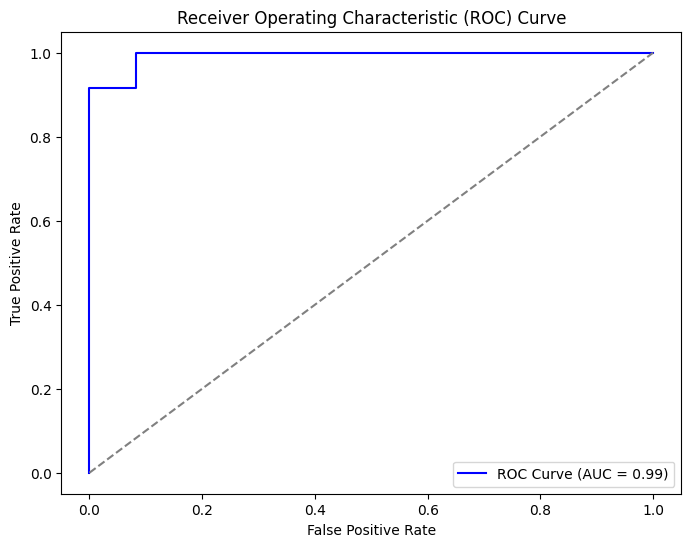

AUC Score: 0.99


In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the positive class
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Dataset
# Assuming that the file 'assignment4_dataset.csv' contains both the expression data and labels
data = pd.read_csv('assignment4_dataset.csv', index_col=0)

X = data.iloc[:, :5000]

y_health = data['Group']
# Split data for health status prediction
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(X, y_health, test_size=0.2, random_state=42)

# Initialize and fit Logistic Regression model for health status
log_reg_health = LogisticRegression(max_iter=1000, random_state=42)
log_reg_health.fit(X_train_health, y_train_health)

# Make predictions and evaluate
y_pred_health = log_reg_health.predict(X_test_health)
print("\n--- Health Status Prediction (RA vs. Healthy) ---")
print(f"Accuracy: {accuracy_score(y_test_health, y_pred_health)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_health, y_pred_health))
print("Classification Report:")
print(classification_report(y_test_health, y_pred_health))

# Step 3: Predict Clusters from Assignment 3 (2 Clusters)
# Define 'spectral_cluster_2' as target for 2 clusters
y_cluster = data['Spectral Cluster']

# Handle NaN values if any (drop rows with NaN in 'spectral_cluster_2')

# Split data for cluster prediction
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X, y_cluster, test_size=0.2, random_state=42)

# Initialize and fit Logistic Regression model for cluster prediction
log_reg_cluster = LogisticRegression(max_iter=1000, random_state=42)
log_reg_cluster.fit(X_train_cluster, y_train_cluster)

# Make predictions and evaluate
y_pred_cluster = log_reg_cluster.predict(X_test_cluster)
print("\n--- Cluster Prediction (2 Clusters from Assignment 3) ---")
print(f"Accuracy: {accuracy_score(y_test_cluster, y_pred_cluster)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_cluster, y_pred_cluster))
print("Classification Report:")
print(classification_report(y_test_cluster, y_pred_cluster))



--- Health Status Prediction (RA vs. Healthy) ---
Accuracy: 0.9583333333333334
Confusion Matrix:
[[11  1]
 [ 0 12]]
Classification Report:
                  precision    recall  f1-score   support

         healthy       1.00      0.92      0.96        12
ra non treatment       0.92      1.00      0.96        12

        accuracy                           0.96        24
       macro avg       0.96      0.96      0.96        24
    weighted avg       0.96      0.96      0.96        24


--- Cluster Prediction (2 Clusters from Assignment 3) ---
Accuracy: 1.0
Confusion Matrix:
[[18  0]
 [ 0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




--- Health Status Prediction (RA vs. Healthy) with 10 genes ---
AUC: 0.39
Confusion Matrix:
[[6 6]
 [6 6]]
Classification Report:
                  precision    recall  f1-score   support

         healthy       0.50      0.50      0.50        12
ra non treatment       0.50      0.50      0.50        12

        accuracy                           0.50        24
       macro avg       0.50      0.50      0.50        24
    weighted avg       0.50      0.50      0.50        24


--- Cluster Prediction (2 Clusters) with 10 genes ---
AUC: 0.91
Confusion Matrix:
[[16  2]
 [ 2  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.67      0.67      0.67         6

    accuracy                           0.83        24
   macro avg       0.78      0.78      0.78        24
weighted avg       0.83      0.83      0.83        24


--- Health Status Prediction (RA vs. Healthy) with 100 genes ---


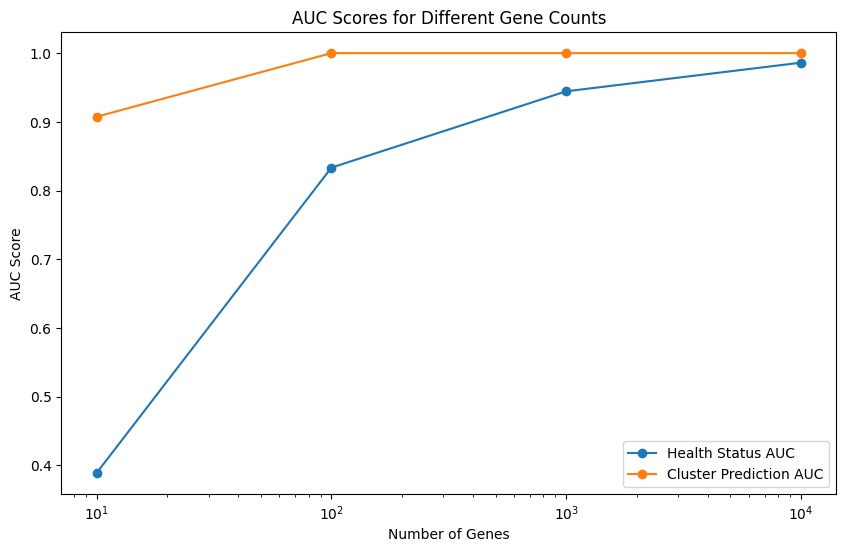

In [38]:
# 4. Retraining with different numbers of genes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('assignment4_dataset.csv', index_col=0)

# Separate features and labels
y_health = data['Group']  # For health status prediction (RA vs. Healthy)
y_cluster = data['Spectral Cluster']  # For spectral clustering prediction

# Define different gene counts to test
gene_counts = [10, 100, 1000, 10000]
auc_results = {'gene_count': [], 'health_auc': [], 'cluster_auc': []}

for gene_count in gene_counts:
    # Select the top genes for the model
    X = data.iloc[:, :gene_count]

    # Step 1: Train and evaluate for health status prediction (RA vs. Healthy)
    X_train, X_test, y_train, y_test = train_test_split(X, y_health, test_size=0.2, random_state=42)
    
    # Train logistic regression model
    log_reg_health = LogisticRegression(max_iter=1000, random_state=42)
    log_reg_health.fit(X_train, y_train)
    
    # Make predictions and calculate AUC
    y_prob_health = log_reg_health.predict_proba(X_test)[:, 1]
    health_auc = roc_auc_score(y_test, y_prob_health)
    auc_results['gene_count'].append(gene_count)
    auc_results['health_auc'].append(health_auc)

    print(f"\n--- Health Status Prediction (RA vs. Healthy) with {gene_count} genes ---")
    print(f"AUC: {health_auc:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, log_reg_health.predict(X_test)))
    print("Classification Report:")
    print(classification_report(y_test, log_reg_health.predict(X_test)))

    # Step 2: Train and evaluate for cluster prediction (2 Clusters)
    X_train, X_test, y_train, y_test = train_test_split(X, y_cluster, test_size=0.2, random_state=42)
    
    # Train logistic regression model for cluster prediction
    log_reg_cluster = LogisticRegression(max_iter=1000, random_state=42)
    log_reg_cluster.fit(X_train, y_train)
    
    # Make predictions and calculate AUC
    y_prob_cluster = log_reg_cluster.predict_proba(X_test)[:, 1]
    cluster_auc = roc_auc_score(y_test, y_prob_cluster)
    auc_results['cluster_auc'].append(cluster_auc)

    print(f"\n--- Cluster Prediction (2 Clusters) with {gene_count} genes ---")
    print(f"AUC: {cluster_auc:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, log_reg_cluster.predict(X_test)))
    print("Classification Report:")
    print(classification_report(y_test, log_reg_cluster.predict(X_test)))

# Step 3: Summarize Results
auc_df = pd.DataFrame(auc_results)
print("\nAUC Results for Different Gene Counts:")
print(auc_df)

# Plot AUC results to observe trends
plt.figure(figsize=(10, 6))
plt.plot(auc_df['gene_count'], auc_df['health_auc'], label='Health Status AUC', marker='o')
plt.plot(auc_df['gene_count'], auc_df['cluster_auc'], label='Cluster Prediction AUC', marker='o')
plt.xlabel("Number of Genes")
plt.ylabel("AUC Score")
plt.title("AUC Scores for Different Gene Counts")
plt.legend()
plt.xscale('log')  # Use a log scale for gene count
plt.show()
